# Notebook 7: Logistic Regression and SoftMax for MNIST

## Learning Goal

The goal of this notebook is to familiarize the reader with SoftMax regression (a generalization of logistic regression to more than two categories), categorical predictions, and the MNIST handwritten dataset. The reader will understand how to use the Scikit Logistic regression package and visualize learned weights.

## Overview
### The MNIST dataset:
The MNIST classification problem is one of the classical ML problems for learning classification on high-dimensional data with a fairly sizable number of examples (60000). Yann LeCun and collaborators collected and processed $70000$ handwritten digits (60000 are used for training and 10000 for testing) to produce what became known as one of the most widely used datasets in ML: the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Each handwritten digit comes in a grayscale square image in the shape of a $28\times 28$ pixel grid. Every pixel takes a value in the range $[0,255]$, representing $256$ nuances of the gray color. The problem of image classification finds applications in a wide range of fields and is important for numerous industry applications of ML. 
### SoftMax regression:
We will use SoftMax regression, which can be thought of as a statistical model which assigns a probability that a given input image corresponds to any of the 10 handwritten digits. The model is a generalization of the logistic regression and reads:
$$
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}}
$$
Where $p(y=i|\boldsymbol{x};W)$ is the probability that input $\boldsymbol{x}$ is the $i$-th digit, $i\in[0,9]$.
The model also has 10 weight vectors $\boldsymbol{w}_i$ which we will train below. Finally, one can use this information for prediction by taking the value of $y$ for which this probability is maximized:
\begin{align}
y_{pred}=\arg\max_i p(y=i|\boldsymbol{x})
\end{align}

## Numerical Experiments

The reader is invited to check out the code below to build up their intuition about SoftMax regression. The following notebook is a slight modification of [this Scikit tutorial](http://scikit-learn.org/dev/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html) by Arthur Mensch on studying the MNIST problem using Logistic Regression.

In [1]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)
# shuffle data

Automatically created module for IPython interactive environment
(70000, 784)


***Exercise : *** The data you have here is sorted, write a piece of code to shuffle the data

In [3]:
random_indices=np.arange(y.size)
np.random.shuffle(random_indices)
X_shuffled=np.empty_like(X)
y_shuffled=np.empty_like(y)
for i in range(y_shuffled.size):
    X_shuffled[i,:]=X[random_indices[i],:]
    y_shuffled[i]=y[random_indices[i]]
X=X_shuffled.copy()
y=y_shuffled.copy()

In [5]:
# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial', #Permet de faire une regression logistique de type soft max
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train_scaled, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test_scaled, y_test)
print(clf.coef_)
#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Example run in 66.553 s
Sparsity with L2 penalty: 9.57%
Test score with L2 penalty: 0.8994


(10, 784)


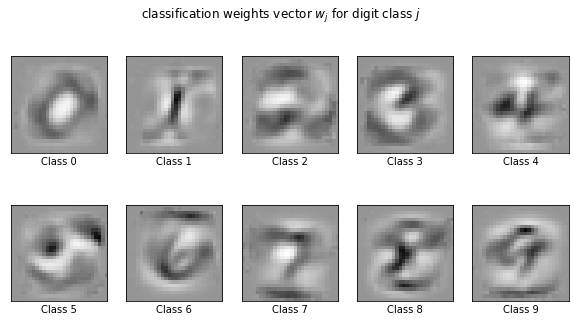

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()
print(coef.shape)
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

### Exercises: ###  

* The snippet above invoked the "sag" solver which only deals with $L2$ regularization. Try another solver, e.g. 'liblinear', in scikit that supports $L1$ regularization. You can find more details on <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.</a>


In [7]:
clf = LogisticRegression(C=1e5, #parametre de regularisation
                         multi_class='multinomial', #Permet de faire une regression logistique de type soft max
                         penalty='l1', solver='saga', tol=0.1)             #penalty = type de regularisation L1 lasso L2 ridge
clf.fit(X_train_scaled, y_train)



LogisticRegression(C=100000.0, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)


* Visualize the misclassified samples. Analyze on how logistic regression performs on MNIST, and note this since we will study the MNIST problem later on using deep neural nets.


(array([    3,     8,    25, ..., 49966, 49969, 49990], dtype=int64),)
(1, 5682)
[8789, 14370, 24319, 34687, 42078, 48194, 41419, 1354, 1131, 49346, 47194, 24922]
%d'erreurs: 0.10060000000000002


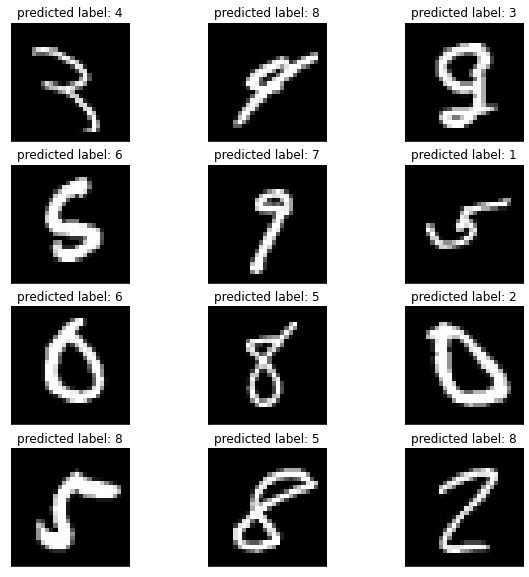

In [8]:
errors = np.where(y_train != clf.predict(X_train_scaled))

print(errors)
print(np.shape(errors))
from random import sample
nums=sample(list(errors[0]),12)
print(nums)

plt.figure(figsize=(10, 10))
for i in range(12):
    missclassified_plot=plt.subplot(4, 3, i + 1)
    missclassified_plot.imshow(X_train[nums[i], :].reshape(28,28), cmap="gray")
    missclassified_plot.set_title("predicted label: %d" % (clf.predict(X_train_scaled[nums[i], :].reshape(1, -1))))
    missclassified_plot.axes.get_xaxis().set_visible(False)
    missclassified_plot.axes.get_yaxis().set_visible(False)
print("%d'erreurs:",1-score)

(array([   4,   15,   17, ..., 9962, 9963, 9977]),)
(1, 1191)
[4713, 1573, 8003, 964, 2253, 4405, 717, 374, 7407, 1564, 8126, 9625]
precision 0.1191


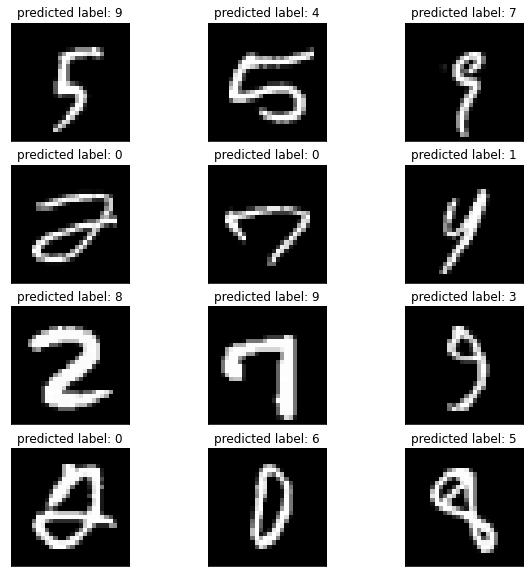

In [8]:
errors = np.where(y_test != clf.predict(X_test_scaled))

print(errors)
print(np.shape(errors))
from random import sample
nums=sample(list(errors[0]),12)
print(nums)

plt.figure(figsize=(10, 10))
for i in range(12):
    missclassified_plot=plt.subplot(4, 3, i + 1)
    missclassified_plot.imshow(X_test[nums[i], :].reshape(28,28), cmap="gray")
    missclassified_plot.set_title("predicted label: %d" % (clf.predict(X_test_scaled[nums[i], :].reshape(1, -1))))
    missclassified_plot.axes.get_xaxis().set_visible(False)
    missclassified_plot.axes.get_yaxis().set_visible(False)
print('precision',errors[0].size/y_test.size)

L'erreur (11%) est legerement plus faible que celle obtenu avec la méthode knn.

* Try to vary the size of the training set and see how that affects the accuracy.

In [9]:
sizes=[10,100,1000,10000,20000,30000,40000,50000,60000]
for train_size in sizes:    
    # pick training and test data sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

    # scale data to have zero mean and unit variance [required by regressor]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # apply logistic regressor with 'sag' solver, C is the inverse regularization strength
    clf = LogisticRegression(C=1e5,
                             multi_class='multinomial', #Permet de faire une regression logistique de type soft max
                             penalty='l2', solver='sag', tol=0.1)
    # fit data
    clf.fit(X_train_scaled, y_train)
    # percentage of nonzero weights
    sparsity = np.mean(clf.coef_ == 0) * 100
    # compute accuracy
    score = clf.score(X_test_scaled, y_test)



    clf = LogisticRegression(C=1e5, #parametre de regularisation
                             multi_class='multinomial', #Permet de faire une regression logistique de type soft max
                             penalty='l1', solver='saga', tol=0.1)             #penalty = type de regularisation L1 lasso L2 ridge
    clf.fit(X_train_scaled, y_train)

    errors = np.where(y_test != clf.predict(X_test_scaled))
    
    score=clf.score(X_test_scaled,y_test)
    print('train_size:',train_size,'score',score)

train_size: 10 score 0.2327
train_size: 100 score 0.6996
train_size: 1000 score 0.8431
train_size: 10000 score 0.8787
train_size: 20000 score 0.8875
train_size: 30000 score 0.8779
train_size: 40000 score 0.8843
train_size: 50000 score 0.8841
train_size: 60000 score 0.8831




*  [Theory] In this notebook, we considered a $K=10$ multi-class logistic regression (MLR) also known as the SoftMax regression. Recall that the our model reads:
$$
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}}
$$
Use this to construct the likelihood function $P(y|\boldsymbol{x})$.





$$P(\mathcal{D}|{\bf W})= \prod_{i=1}^{n} \prod_{j=1}^{K}\frac{e^{\boldsymbol{w}_j^T \boldsymbol{x}}}{\sum_{k=0}^9 e^{\boldsymbol{w}_k^T \boldsymbol{x}}}\boldsymbol{x_i};W)$$
$$=\prod_{i=1}^{n} \prod_{j=0}^{9} [P(y_{ij} =1||{\bf x_i},{\bf w_j})]^{y_{ij}}[1-P(y_ij =1||{\bf x_i},{\bf w_j})]^{1-y_{ij}}$$


* [Theory] Now consider we're given a set of i.i.d. data $\mathcal{D}=\{(\boldsymbol{x}_1,y_1),\cdots, (\boldsymbol{x}_n,y_n)\}$. As we argued in the main text, the cross-entropy error used in logistic regression is motivated by maximizing the likelihood (or equivalently, minimizing the negative log-likelihood), find the corresponding error function $E(\boldsymbol{w}_0,\cdots,\boldsymbol{w}_9)$ in MLR using the hypothesis above. 
 $$E(\boldsymbol{w}_0,\cdots,\boldsymbol{w}_9) = -\log((P(y|\boldsymbol{x})) = -\sum_{i=1}^{n}\sum_{m=0}^9 y_{im}\log P(y_{im}=1|\boldsymbol{x}_i,\boldsymbol{w}_m) + (1-y_{im}) \log[1-P(y_{im} = 1|\boldsymbol{x}_i,\boldsymbol{w}_m)]$$

### BONUS### 


* [Theory] Using the error function derived above, calculate its gradient $\frac{\partial E}{\partial \boldsymbol{w}_k}$. Can you find an elegant way of writing the gradient?